In [17]:
import pandas as pd
import seaborn as sns

ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Análise Exploratória


In [18]:
ratings.shape

(100836, 4)

In [19]:
ratings.columns = ["UsuárioID", "FilmeID", "Notas", "Momento"]
ratings

,UsuárioID,FilmeID,Notas,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [20]:
ratings['Notas'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [21]:
ratings['Notas'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Notas, dtype: int64

In [22]:
ratings['Notas'].mean()

3.501556983616962

Plotar Serie

<AxesSubplot:ylabel='Frequency'>

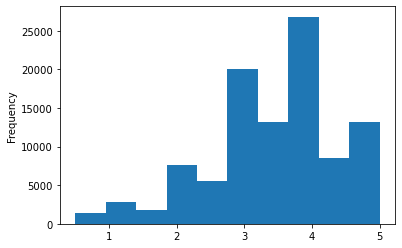

In [23]:
ratings.Notas.plot(kind='hist')

In [24]:
ratings.Notas.median()

3.5

In [25]:
ratings.Notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Notas, dtype: float64

C:\Users\PICHAU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Notas'>

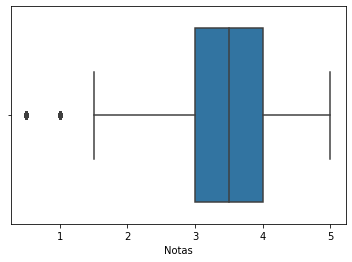

In [26]:
sns.boxplot(ratings.Notas)

In [28]:
ratings.query('FilmeID==1').Notas

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: Notas, Length: 215, dtype: float64

In [29]:
ratings.query('FilmeID==1').Notas.mean()

3.9209302325581397

In [30]:
ratings.query('FilmeID==2').Notas.mean()

3.4318181818181817

In [34]:
media_por_filme = ratings.groupby('FilmeID').mean()["Notas"]

<AxesSubplot:ylabel='Frequency'>

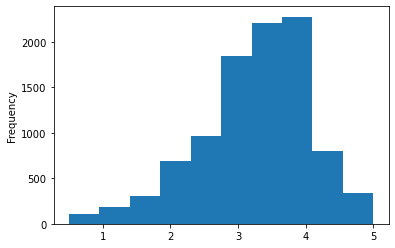

In [35]:
media_por_filme.plot(kind='hist')

C:\Users\PICHAU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Notas'>

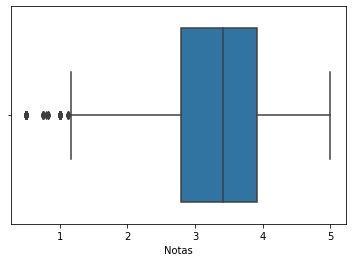

In [36]:
sns.boxplot(media_por_filme)

In [37]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Notas, dtype: float64

C:\Users\PICHAU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Notas', ylabel='Density'>

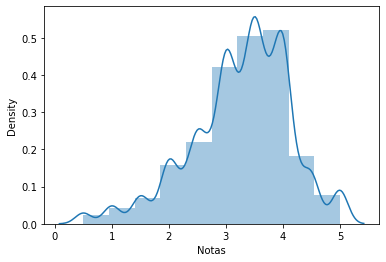

In [42]:
sns.distplot(media_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das média dos filmes')

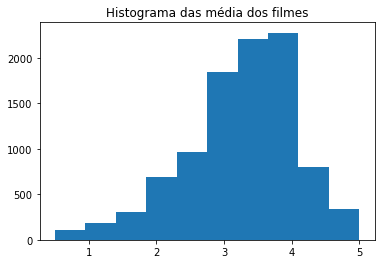

In [44]:
import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title('Histograma das média dos filmes')